<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Whether a loan is paid off</font></h1>

In [745]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

# Data exploration

### *** To predict "Whether a loan is paid off", we need some fields: 'Principal', 'Terms', 'Age', 'Gender', 'Effective_date' 

### Load Data From CSV File  

In [746]:
df= pd.read_csv('./loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [747]:
df.tail()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male
345,399,399,COLLECTION,1000,30,9/12/2016,10/11/2016,26,college,male


In [748]:
df.shape

(346, 10)

In [749]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


In [750]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


In [751]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
print (df['due_date'])
df['effective_date'] 

0     2016-10-07
1     2016-10-07
2     2016-09-22
3     2016-10-08
4     2016-10-08
         ...    
341   2016-09-25
342   2016-10-10
343   2016-09-26
344   2016-11-10
345   2016-10-11
Name: due_date, Length: 346, dtype: datetime64[ns]


0     2016-09-08
1     2016-09-08
2     2016-09-08
3     2016-09-09
4     2016-09-09
         ...    
341   2016-09-11
342   2016-09-11
343   2016-09-12
344   2016-09-12
345   2016-09-12
Name: effective_date, Length: 346, dtype: datetime64[ns]

# Data visualization

In [752]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      346 non-null    int64         
 1   Unnamed: 0.1    346 non-null    int64         
 2   loan_status     346 non-null    object        
 3   Principal       346 non-null    int64         
 4   terms           346 non-null    int64         
 5   effective_date  346 non-null    datetime64[ns]
 6   due_date        346 non-null    datetime64[ns]
 7   age             346 non-null    int64         
 8   education       346 non-null    object        
 9   Gender          346 non-null    object        
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 27.2+ KB


In [753]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

**260** people have paid off the loan on time while **86** have gone into collection 

In [754]:
import numpy as np
import matplotlib.pyplot as plt

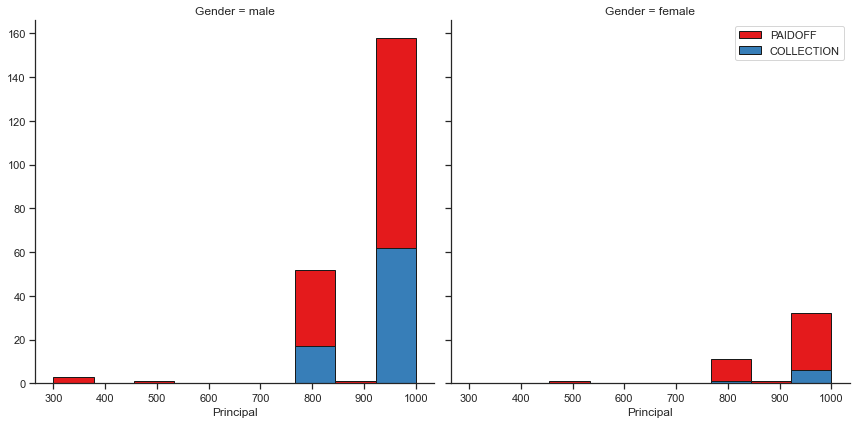

<Figure size 432x288 with 0 Axes>

In [759]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2, height=6)
g.map(plt.hist, 'Principal', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()
plt.clf()

According to the diagram, we can see that:
- the paidoff loan status of male gender is higher than female (about 160 in male and about 40 in female)
- the collection loan status of male is also higher than female (about 70 in male and about 10 in female)
- the rate of principal in both male and female is highest in 1000 and 800
- besides, the data is not equal, focus most in 800 and 100, less in 300 and 500 (for male), and 500 (for female)

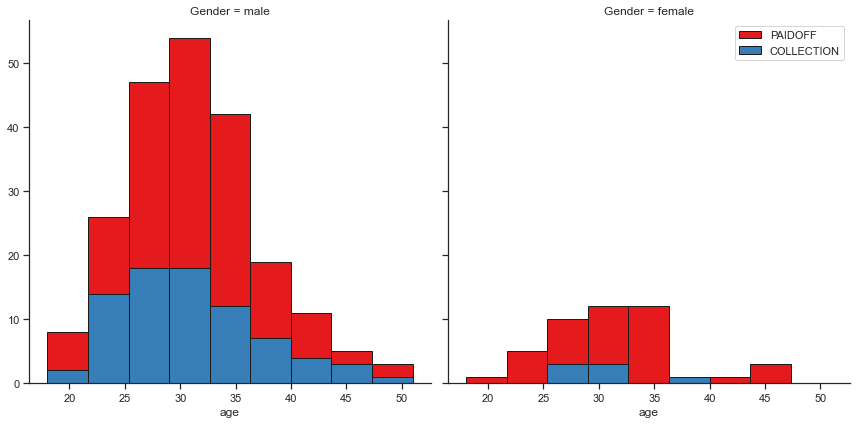

In [760]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2, height=6)
g.map(plt.hist, 'age', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

According to the diagram, we can see that:

- the age of male who borrow money is from 20 to about 50, while it is just from 20 to about 45 in female
- male tends to have the paid loan status higher than female, more than 50 in male but just about 30 in female
- male has the collection loan status more than female, in every aging gap

# Pre-processing:  Feature selection/extraction

In [761]:
dayofweek = pd.date_range('2016-09-08', '2016-09-12', freq='D').to_series()
d = dayofweek.dt.dayofweek
d

2016-09-08    3
2016-09-09    4
2016-09-10    5
2016-09-11    6
2016-09-12    0
Freq: D, dtype: int64

In [762]:
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['dayofweek']

0      3
1      3
2      3
3      4
4      4
      ..
341    6
342    6
343    0
344    0
345    0
Name: dayofweek, Length: 346, dtype: int64

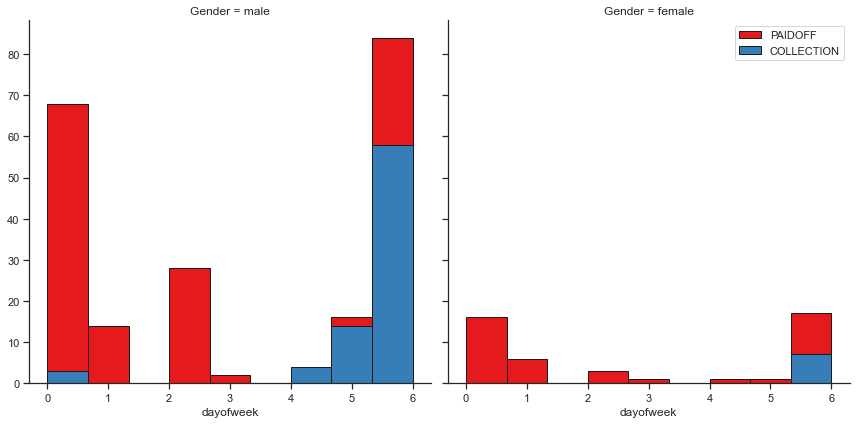

In [765]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2, height=6)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

According to the dayofweek diagram,
- People tend to pay loan off on early week (both male and female)
- people tend not to pay the loan on weekend (especially to male) 
- the data is not equal to the whole week

In [766]:
df['weekend'] = np.where(df['dayofweek'] > 3, True, False)
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,False
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,False
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,False
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,True
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male,6,True
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male,6,True
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male,0,False
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male,0,False


In [767]:
df['weekend'].value_counts()

True     205
False    141
Name: weekend, dtype: int64

## Convert Categorical features to numerical values

In [768]:
df['loan_status'].shape

(346,)

In [769]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

**86** % of female pay there loans while only **73** % of males pay there loan

In [770]:
df['Gender'].replace(['female','male'],[0,1],inplace=True)
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,1,3,False
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,0,3,False
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,1,3,False
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,0,4,True
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,1,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,1,6,True
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,1,6,True
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,1,0,False
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,1,0,False


## One Hot Encoding  

In [771]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [772]:
df_new= df[['Principal','terms', 'age', 'Gender', 'education']]
df_new.head()

,Principal,terms,age,Gender,education
0,1000,30,45,1,High School or Below
1,1000,30,33,0,Bechalor
2,1000,15,27,1,college
3,1000,30,28,0,college
4,1000,30,29,1,college


In [773]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

In [774]:
Feature = df[['Principal','terms','age','Gender','weekend', 'education']]
Feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Principal  346 non-null    int64 
 1   terms      346 non-null    int64 
 2   age        346 non-null    int64 
 3   Gender     346 non-null    int64 
 4   weekend    346 non-null    bool  
 5   education  346 non-null    object
dtypes: bool(1), int64(4), object(1)
memory usage: 14.0+ KB


In [775]:
new= pd.get_dummies(Feature)
Feature['education']=new

In [776]:
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,education,Bechalor,High School or Below,college
0,1000,30,45,1,False,1000,0,1,0
1,1000,30,33,0,False,1000,1,0,0
2,1000,15,27,1,False,1000,0,0,1
3,1000,30,28,0,True,1000,0,0,1
4,1000,30,29,1,True,1000,0,0,1


## Normalize Data 

In [779]:
Feature.skew()

Principal              -2.600236
terms                  -0.268940
age                     0.700410
Gender                 -1.965754
weekend                -0.378079
education              -2.600236
Bechalor                2.247911
High School or Below    0.257535
college                 0.281387
dtype: float64

In [780]:
from sklearn.preprocessing import StandardScaler

In [781]:
scaler = StandardScaler()

In [849]:
Feature_scale = scaler.fit_transform(Feature)
Feature_scale = pd.DataFrame(Feature_scale, columns= Feature.columns)

In [850]:
Feature_scale.head()

,Principal,terms,age,Gender,weekend,education,Bechalor,High School or Below,college
0,0.515785,0.920718,2.331526,0.420560,-1.205778,0.515785,-0.381701,1.136394,-0.869681
1,0.515785,0.920718,0.341701,-2.377782,-1.205778,0.515785,2.619854,-0.879977,-0.869681
2,0.515785,-0.959111,-0.653211,0.420560,-1.205778,0.515785,-0.381701,-0.879977,1.149847
3,0.515785,0.920718,-0.487392,-2.377782,0.829340,0.515785,-0.381701,-0.879977,1.149847
4,0.515785,0.920718,-0.321573,0.420560,0.829340,0.515785,-0.381701,-0.879977,1.149847


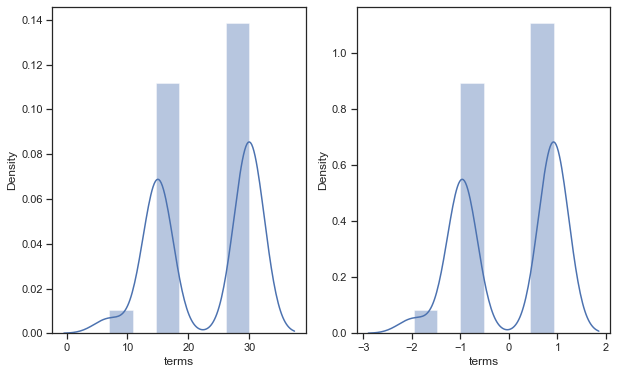

In [851]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.distplot(df['terms'])
plt.subplot(122)
sns.distplot(Feature_scale['terms'])
plt.show()

In [852]:
X= Feature_scale
X.head()

,Principal,terms,age,Gender,weekend,education,Bechalor,High School or Below,college
0,0.515785,0.920718,2.331526,0.420560,-1.205778,0.515785,-0.381701,1.136394,-0.869681
1,0.515785,0.920718,0.341701,-2.377782,-1.205778,0.515785,2.619854,-0.879977,-0.869681
2,0.515785,-0.959111,-0.653211,0.420560,-1.205778,0.515785,-0.381701,-0.879977,1.149847
3,0.515785,0.920718,-0.487392,-2.377782,0.829340,0.515785,-0.381701,-0.879977,1.149847
4,0.515785,0.920718,-0.321573,0.420560,0.829340,0.515785,-0.381701,-0.879977,1.149847


In [854]:
y= df['loan_status']

# Logistic Regression

In [855]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

In [856]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2, random_state= 42)

In [857]:
clf = LogisticRegression()

In [858]:
model = clf.fit(X_train,Y_train)

In [859]:
print(clf.score(X_train,Y_train))

0.7608695652173914


In [860]:
print(clf.score(X_test,Y_test))

0.7


In [861]:
y_pred = clf.predict(X_test)

# Model Evaluation using Test set

In [862]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [863]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

  COLLECTION       0.23      0.21      0.22        14
     PAIDOFF       0.81      0.82      0.81        56

    accuracy                           0.70        70
   macro avg       0.52      0.52      0.52        70
weighted avg       0.69      0.70      0.70        70



In [869]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[ 3, 11],
       [10, 46]])

- the model predict correctly 3 of 14 people do not pay for the loan
- predict correctly 46 of 56 people pay the loan

=> to increace the accuracy of the people who don't pay for the loan, need to improve the model (might depend on the needs of company)

### Load Test set for evaluation 

In [903]:
df2=pd.read_csv('loan_test.csv')
df2.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [904]:
df2.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,54.000000,54.000000,54.000000,54.000000,54.000000
mean,182.407407,182.407407,914.814815,21.888889,31.833333
std,116.220759,116.220759,174.190751,8.818220,5.992920
min,1.000000,1.000000,300.000000,7.000000,20.000000
25%,79.500000,79.500000,800.000000,15.000000,28.000000
50%,174.000000,174.000000,1000.000000,30.000000,30.500000
75%,300.250000,300.250000,1000.000000,30.000000,36.000000
max,396.000000,396.000000,1000.000000,30.000000,50.000000


In [905]:
df2['due_date'] = pd.to_datetime(df2['due_date'])
df2['effective_date'] = pd.to_datetime(df2['effective_date'])
print (df2['due_date'])
df2['effective_date'] 

0    2016-10-07
1    2016-09-15
2    2016-10-09
3    2016-10-09
4    2016-09-25
5    2016-09-25
6    2016-09-25
7    2016-10-10
8    2016-09-25
9    2016-09-25
10   2016-09-25
11   2016-09-17
12   2016-10-10
13   2016-10-10
14   2016-10-10
15   2016-11-09
16   2016-09-25
17   2016-09-17
18   2016-09-25
19   2016-09-17
20   2016-10-10
21   2016-09-17
22   2016-09-18
23   2016-10-26
24   2016-09-26
25   2016-10-11
26   2016-10-11
27   2016-10-11
28   2016-10-11
29   2016-11-10
30   2016-10-11
31   2016-09-26
32   2016-11-10
33   2016-10-11
34   2016-09-26
35   2016-10-12
36   2016-10-12
37   2016-09-27
38   2016-10-13
39   2016-10-13
40   2016-10-08
41   2016-09-24
42   2016-09-24
43   2016-10-09
44   2016-09-24
45   2016-10-09
46   2016-10-09
47   2016-10-10
48   2016-09-25
49   2016-10-10
50   2016-09-25
51   2016-10-10
52   2016-09-25
53   2016-10-11
Name: due_date, dtype: datetime64[ns]


0    2016-09-08
1    2016-09-09
2    2016-09-10
3    2016-09-10
4    2016-09-11
5    2016-09-11
6    2016-09-11
7    2016-09-11
8    2016-09-11
9    2016-09-11
10   2016-09-11
11   2016-09-11
12   2016-09-11
13   2016-09-11
14   2016-09-11
15   2016-09-11
16   2016-09-11
17   2016-09-11
18   2016-09-11
19   2016-09-11
20   2016-09-11
21   2016-09-11
22   2016-09-12
23   2016-09-12
24   2016-09-12
25   2016-09-12
26   2016-09-12
27   2016-09-12
28   2016-09-12
29   2016-09-12
30   2016-09-12
31   2016-09-12
32   2016-09-12
33   2016-09-12
34   2016-09-12
35   2016-09-13
36   2016-09-13
37   2016-09-13
38   2016-09-14
39   2016-09-14
40   2016-09-09
41   2016-09-10
42   2016-09-10
43   2016-09-10
44   2016-09-10
45   2016-09-10
46   2016-09-10
47   2016-09-11
48   2016-09-11
49   2016-09-11
50   2016-09-11
51   2016-09-11
52   2016-09-11
53   2016-09-12
Name: effective_date, dtype: datetime64[ns]

In [906]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      54 non-null     int64         
 1   Unnamed: 0.1    54 non-null     int64         
 2   loan_status     54 non-null     object        
 3   Principal       54 non-null     int64         
 4   terms           54 non-null     int64         
 5   effective_date  54 non-null     datetime64[ns]
 6   due_date        54 non-null     datetime64[ns]
 7   age             54 non-null     int64         
 8   education       54 non-null     object        
 9   Gender          54 non-null     object        
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 4.3+ KB


In [907]:
df2['loan_status'].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

In [908]:
dayofweek = pd.date_range('2016-09-08', '2016-09-12', freq='D').to_series()
d = dayofweek.dt.dayofweek
d

2016-09-08    3
2016-09-09    4
2016-09-10    5
2016-09-11    6
2016-09-12    0
Freq: D, dtype: int64

In [909]:
df2['effective_date'] = pd.to_datetime(df2['effective_date'])
df2['dayofweek'] = df2['effective_date'].dt.dayofweek
df2['dayofweek'][:5]

0    3
1    4
2    5
3    5
4    6
Name: dayofweek, dtype: int64

In [910]:
df2['weekend'] = np.where(df2['dayofweek'] > 3, True, False)
df2[:10]

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,False
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,True
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,True
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,True
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,True
5,37,37,PAIDOFF,700,15,2016-09-11,2016-09-25,33,High School or Below,male,6,True
6,38,38,PAIDOFF,1000,15,2016-09-11,2016-09-25,24,college,male,6,True
7,48,48,PAIDOFF,1000,30,2016-09-11,2016-10-10,32,Bechalor,male,6,True
8,50,50,PAIDOFF,800,15,2016-09-11,2016-09-25,27,college,female,6,True
9,61,61,PAIDOFF,1000,15,2016-09-11,2016-09-25,37,college,male,6,True


In [911]:
df2.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.727273
        COLLECTION     0.272727
male    PAIDOFF        0.744186
        COLLECTION     0.255814
Name: loan_status, dtype: float64

In [912]:
df2['Gender'].replace(['female','male'],[0,1],inplace=True)
df2[:10]

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,0,3,False
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,1,4,True
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,0,5,True
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,1,5,True
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,1,6,True
5,37,37,PAIDOFF,700,15,2016-09-11,2016-09-25,33,High School or Below,1,6,True
6,38,38,PAIDOFF,1000,15,2016-09-11,2016-09-25,24,college,1,6,True
7,48,48,PAIDOFF,1000,30,2016-09-11,2016-10-10,32,Bechalor,1,6,True
8,50,50,PAIDOFF,800,15,2016-09-11,2016-09-25,27,college,0,6,True
9,61,61,PAIDOFF,1000,15,2016-09-11,2016-09-25,37,college,1,6,True


In [913]:
df2.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        1.000000
High School or Below  PAIDOFF        0.523810
                      COLLECTION     0.476190
Master or Above       PAIDOFF        1.000000
college               PAIDOFF        0.826087
                      COLLECTION     0.173913
Name: loan_status, dtype: float64

In [914]:
df_new2= df2[['Principal','terms', 'age', 'Gender', 'education']]
df_new2.head()

,Principal,terms,age,Gender,education
0,1000,30,50,0,Bechalor
1,300,7,35,1,Master or Above
2,1000,30,43,0,High School or Below
3,1000,30,26,1,college
4,800,15,29,1,Bechalor


In [915]:
Feature2 = df2[['Principal','terms','age','Gender','weekend', 'education']]
Feature2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Principal  54 non-null     int64 
 1   terms      54 non-null     int64 
 2   age        54 non-null     int64 
 3   Gender     54 non-null     int64 
 4   weekend    54 non-null     bool  
 5   education  54 non-null     object
dtypes: bool(1), int64(4), object(1)
memory usage: 2.3+ KB


In [916]:
new2= pd.get_dummies(Feature2)
Feature2['education']=new2

In [917]:
Feature2 = pd.concat([Feature2,pd.get_dummies(df2['education'])], axis=1)
Feature2.drop(['Master or Above'], axis = 1,inplace=True)
Feature2.head()

,Principal,terms,age,Gender,weekend,education,Bechalor,High School or Below,college
0,1000,30,50,0,False,1000,1,0,0
1,300,7,35,1,True,300,0,0,0
2,1000,30,43,0,True,1000,0,1,0
3,1000,30,26,1,True,1000,0,0,1
4,800,15,29,1,True,800,1,0,0


In [918]:
Feature2.skew()

Principal              -2.593698
terms                  -0.325748
age                     0.764769
Gender                 -1.513739
weekend                -0.552338
education              -2.593698
Bechalor                2.037939
High School or Below    0.468971
college                 0.308231
dtype: float64

In [919]:
Feature2_scale_test = scaler.fit_transform(Feature2)
Feature2_scale_test = pd.DataFrame(Feature2_scale_test, columns= Feature2.columns)

In [920]:
Feature2_scale_test.head()

,Principal,terms,age,Gender,weekend,education,Bechalor,High School or Below,college
0,0.493626,0.928450,3.059819,-1.977142,-1.303840,0.493626,2.397916,-0.797724,-0.861357
1,-3.562691,-1.704277,0.533363,0.505781,0.766965,-3.562691,-0.417029,-0.797724,-0.861357
2,0.493626,0.928450,1.880806,-1.977142,0.766965,0.493626,-0.417029,1.253566,-0.861357
3,0.493626,0.928450,-0.982511,0.505781,0.766965,0.493626,-0.417029,-0.797724,1.160959
4,-0.665322,-0.788546,-0.477219,0.505781,0.766965,-0.665322,2.397916,-0.797724,-0.861357


In [922]:
X_new= Feature2_scale_test

In [923]:
y_new=df2['loan_status']

# Model Evaluation

In [925]:
clf.score(X_new,y_new)

0.7777777777777778

In [932]:
y_pred_new = clf.predict(X_new)

In [933]:
model.coef_

array([[ 0.02511908, -0.31901679,  0.18599534, -0.33980173, -1.68008242,
         0.02511908,  0.10730464,  0.09673645,  0.32377532]])

In [928]:
print(classification_report(y_new, y_pred_new))

              precision    recall  f1-score   support

  COLLECTION       0.67      0.29      0.40        14
     PAIDOFF       0.79      0.95      0.86        40

    accuracy                           0.78        54
   macro avg       0.73      0.62      0.63        54
weighted avg       0.76      0.78      0.74        54



In [930]:
cnf_matrix = metrics.confusion_matrix(y_new, y_pred_new)
cnf_matrix

array([[ 4, 10],
       [ 2, 38]])

- the model predict correctly 4 of 14 people do not pay for the loan
- predict correctly 38 of 40 people pay the loan

=> need to improve model depends on the needs of company